# Import libraries

In [4]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# Data collection

In [5]:
Comfirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [6]:
comfirmed_csv = 'comfirmed_cases.csv'

In [7]:
urllib.request.urlretrieve(Comfirmed_url, 'comfirmed_cases.csv')

('comfirmed_cases.csv', <http.client.HTTPMessage at 0x355d6f8210>)

In [8]:
df_CovidconfirmdG  = pd.read_csv(comfirmed_csv)

In [9]:
df_CovidconfirmdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [10]:
df_CovidconfirmdG = df_CovidconfirmdG.dropna(axis=1)

In [11]:
df_CovidconfirmdG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [12]:
df_CovidconfirmdG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), object(1)
memory usage: 2.5+ MB


In [13]:
df_CovidconfirmdG[['Country/Region']] = df_CovidconfirmdG[['Country/Region']].astype("string")

In [14]:
#Delete column with o value 
df_CovidconfirmdG = df_CovidconfirmdG.loc[:, (df_CovidconfirmdG != 0).any(axis=0)]

In [15]:
df_CovidconfirmdG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


# Load Recovered cases

In [16]:
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [17]:
recovered_csv = 'recovered_cases.csv'

In [18]:
urllib.request.urlretrieve(recovered_url, 'recovered_cases.csv')

('recovered_cases.csv', <http.client.HTTPMessage at 0x355e302090>)

In [19]:
df_CovidRecovdG = pd.read_csv(recovered_csv)

In [20]:
df_CovidRecovdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_CovidRecovdG = df_CovidRecovdG.loc[:, (df_CovidRecovdG != 0).any(axis=0)]

In [22]:
df_CovidRecovdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,189341,189658,0,0,0,0,0,0,0,0


In [23]:
df_CovidRecovdG = df_CovidRecovdG.dropna(axis=1)

In [24]:
df_CovidRecovdG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
270,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,Yemen,0,0,0,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0
272,Zambia,0,0,0,0,0,0,0,0,0,...,189341,189658,0,0,0,0,0,0,0,0


In [25]:
df_CovidRecovdG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 570 entries, Country/Region to 9/20/22
dtypes: int64(569), object(1)
memory usage: 1.2+ MB


In [26]:
df_CovidRecovdG[['Country/Region']] = df_CovidRecovdG[['Country/Region']].astype("string")

# Load Death cases

In [27]:
death_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [28]:
death_csv = 'death_cases.csv'

In [29]:
urllib.request.urlretrieve(death_url, 'death_cases.csv')

('death_cases.csv', <http.client.HTTPMessage at 0x355dd32510>)

In [30]:
df_CoviddeathG = pd.read_csv(death_csv)

In [31]:
df_CoviddeathG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [32]:
#Delete column with o value 
df_CoviddeathG = df_CoviddeathG.loc[:, (df_CoviddeathG != 0).any(axis=0)]

In [33]:
df_CoviddeathG = df_CoviddeathG.dropna(axis=1)

In [34]:
df_CoviddeathG[['Country/Region']] = df_CoviddeathG[['Country/Region']].astype("string")

In [35]:
df_CoviddeathG

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [36]:
df_CoviddeathG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), string(1)
memory usage: 2.5 MB


# Load External cases

In [37]:
external_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'

In [38]:
external_csv = 'external_cases.csv'

In [39]:
urllib.request.urlretrieve(external_url, 'external_cases.csv')

('external_cases.csv', <http.client.HTTPMessage at 0x355dcc5d90>)

In [40]:
df_Covidexternal = pd.read_csv(external_csv)

In [41]:
df_Covidexternal

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [42]:
df_Covidexternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [43]:
#Delete column with o value 
df_Covidexternal = df_Covidexternal.loc[:, (df_Covidexternal != 0).any(axis=0)]

In [44]:
df_Covidexternal = df_Covidexternal.dropna(axis=1)

In [45]:
df_Covidexternal[['states', 'region']] = df_Covidexternal[['states', 'region']].astype("string")

In [46]:
df_Covidexternal[['Age', 'Health System', 'Acute IHR', 'Overall CCVI Index']] = df_Covidexternal[['Age', 'Health System', 'Acute IHR', 'Overall CCVI Index']].replace(',', '', regex=True).astype(int)

In [47]:
df_Covidexternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     string 
 1   region                   37 non-null     string 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     int32  
 4   Age                      37 non-null     int32  
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     int32  
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     int32  
dtypes: float64(5), int32(4), int64(1), string(2)
memory usage: 3.0 KB


# Load CovidNigeria cases

In [48]:
covid_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv'

In [49]:
covid_csv = 'covid_cases.csv'

In [50]:
urllib.request.urlretrieve(covid_url, 'covid_cases.csv')

('covid_cases.csv', <http.client.HTTPMessage at 0x355e365d90>)

In [51]:
dfCovidNig= pd.read_csv(covid_csv)

In [52]:
dfCovidNig

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [53]:
#Delete column with o value 
dfCovidNig = dfCovidNig.loc[:, (dfCovidNig != 0).any(axis=0)]

In [54]:
#drop null value: NA
dfCovidNig = dfCovidNig.dropna(axis=1)

In [55]:
#convert to string
dfCovidNig[['States Affected']] = dfCovidNig[['States Affected']].astype("string")

In [56]:
dfCovidNig[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']] = dfCovidNig[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']].replace(',', '', regex=True).astype(int)



In [57]:
dfCovidNig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     string
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(3), int64(1), string(1)
memory usage: 1.1 KB


In [58]:
dfCovidNig

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


# Load Budget data

In [59]:
budget_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'

In [60]:
budget_csv = 'budget_cases.csv'

In [61]:
urllib.request.urlretrieve(budget_url, 'budget_cases.csv')

('budget_cases.csv', <http.client.HTTPMessage at 0x355edb38d0>)

In [62]:
dfBudget = pd.read_csv(budget_csv)


In [63]:
dfBudget

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [64]:
dfBudget[['states']] = dfBudget[['states']].astype("string")

In [65]:
dfBudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     string 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), string(1)
memory usage: 1020.0 bytes


# Load RealGDP data

In [66]:
realgdp_url = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'

In [67]:
Realgdp_csv = 'Realgdp_cases.csv'

In [68]:
urllib.request.urlretrieve(realgdp_url, 'Realgdp_cases.csv')

('Realgdp_cases.csv', <http.client.HTTPMessage at 0x355edb5b90>)

In [69]:
dfRealgdp = pd.read_csv(Realgdp_csv)


In [70]:
dfRealgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [71]:
dfRealgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 412.0 bytes


# Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [72]:
df_CovidconfirmdG.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [73]:
df_CovidconfirmdG.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,28.501730,34.349481,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,291.630499,345.759248,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


In [74]:
df_CovidconfirmdG.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1144)

In [75]:
df_CovidconfirmdG.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


# World Confirm cases

In [76]:
# applying groupby() function to
# group the data on Country/Region value.
ConfirmdCase = df_CovidconfirmdG.groupby('Country/Region')

In [77]:
ConfirmdCase

In [78]:
# print the first entries in all the groups formed.
ConfirmdCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


# National confirmed Covid19 cases

In [79]:
# Finding the values contained in the "Nigeria" group
ConfirmdCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [80]:
NGConfirmdCase = ConfirmdCase.get_group('Nigeria')

In [81]:
NGConfirmdCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [82]:
#Delete column with o value 
NGConfirmdCase = NGConfirmdCase.loc[:, (NGConfirmdCase != 0).any(axis=0)]

In [83]:
NGConfirmdCase

,Country/Region,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,1,1,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [84]:
NGConfirmdCase.columns

Index(['Country/Region', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1107)

In [85]:
NGConfirmdCase_transposed = NGConfirmdCase.transpose()

In [86]:
NGConfirmdCase_transposed.index.name = 'Date'

In [87]:
NGConfirmdCase_transposed = NGConfirmdCase_transposed.drop(index=NGConfirmdCase_transposed.index[0])

In [88]:
NGConfirmdCase_transposed

,206
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [89]:
df_NGConfirmdCase_transposed = NGConfirmdCase_transposed

In [90]:
NGConfirmdCase_transposed

,206
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [91]:
NGConfirmdCase_transposed.columns = ['Cases']

In [92]:
NGConfirmdCase_transposed

,Cases
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [93]:
NGConfirmdCase_transposed.reset_index(drop=False, inplace=True)

In [94]:
NGConfirmdCase_transposed

,Date,Cases
0,2/28/20,1
1,2/29/20,1
2,3/1/20,1
3,3/2/20,1
4,3/3/20,1
...,...,...
1101,3/5/23,266598
1102,3/6/23,266598
1103,3/7/23,266598
1104,3/8/23,266598


# Recovered Cases

In [95]:
# applying groupby() function to
# group the data on 'Country/Region value.
RecoveredCase = df_CovidRecovdG.groupby('Country/Region')

# World Covid19 Recovered cases

In [96]:
# print the first entries in all the groups formed.
RecoveredCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0


In [97]:
# Finding the values contained in the "Nigeria" group
RecoveredCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
191,Nigeria,0,0,0,0,0,0,0,0,0,...,165122,165208,0,0,0,0,0,0,0,0


In [98]:
dfRecoveredCase= RecoveredCase.get_group('Nigeria')

# National Covid19 Recovered cases

In [99]:
dfRecoveredCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
191,Nigeria,0,0,0,0,0,0,0,0,0,...,165122,165208,0,0,0,0,0,0,0,0


In [100]:
#Delete column with o value 
dfRecoveredCase = dfRecoveredCase.loc[:, (dfRecoveredCase != 0).any(axis=0)]

In [101]:
dfRecoveredCase

,Country/Region,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
191,Nigeria,1,1,1,1,2,2,2,2,2,...,164798,164837,164886,164930,164978,164994,165005,165037,165122,165208


In [102]:
dfRecoveredCase_transposed = dfRecoveredCase.transpose()

In [103]:
dfRecoveredCase_transposed.index.name = 'Date'

In [104]:
#dfRecoveredCase.index.name = 'Date'

In [105]:
dfRecoveredCase_transposed = dfRecoveredCase_transposed.drop(index=dfRecoveredCase_transposed.index[0])

In [106]:
dfRecoveredCase_transposed.columns = ['Cases']

In [107]:
dfRecoveredCase_transposed

,Cases
Date,
3/18/20,1
3/19/20,1
3/20/20,1
3/21/20,1
3/22/20,2
...,...
7/31/21,164994
8/1/21,165005
8/2/21,165037


In [108]:
dfRecoveredCase_transposed.columns

Index(['Cases'], dtype='object')

In [109]:
dfRecoveredCase_transposed.reset_index(drop=False, inplace=True)

In [110]:
dfRecoveredCase_transposed

,Date,Cases
0,3/18/20,1
1,3/19/20,1
2,3/20/20,1
3,3/21/20,1
4,3/22/20,2
...,...,...
500,7/31/21,164994
501,8/1/21,165005
502,8/2/21,165037
503,8/3/21,165122


# Deaths Cases

In [111]:
# applying groupby() function to
# group the data on 'Country/Region value.
DeathCase = df_CoviddeathG.groupby('Country/Region')

# World Covid19 Death cases

In [112]:
# print the first entries in all the groups formed.
DeathCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [113]:
# Finding the values contained in the "Nigeria" group
DeathCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [114]:
dfDeathCase = DeathCase.get_group('Nigeria')

# NAtional Covid19 Death cases

In [115]:
dfDeathCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [116]:
#Delete column with o value 
dfDeathCase = dfDeathCase.loc[:, (dfDeathCase != 0).any(axis=0)]

In [117]:
dfDeathCase

,Country/Region,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,2,2,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [118]:
dfDeathCase_transposed = dfDeathCase.transpose()

In [119]:
dfDeathCase_transposed.index.name = 'Date'

In [120]:
dfDeathCase_transposed = dfDeathCase_transposed.drop(index=dfDeathCase_transposed.index[0])

In [121]:
dfDeathCase_transposed.columns = ['Cases']

In [122]:
dfDeathCase_transposed

,Cases
Date,
3/23/20,1
3/24/20,1
3/25/20,1
3/26/20,1
3/27/20,1
...,...
3/5/23,3155
3/6/23,3155
3/7/23,3155


In [123]:
dfDeathCase_transposed.reset_index(drop=False, inplace=True)

In [124]:
dfDeathCase_transposed

,Date,Cases
0,3/23/20,1
1,3/24/20,1
2,3/25/20,1
3,3/26/20,1
4,3/27/20,1
...,...,...
1077,3/5/23,3155
1078,3/6/23,3155
1079,3/7/23,3155
1080,3/8/23,3155


# External

In [125]:
# applying groupby() function to
# group the data on states value.
Covid_ext = df_Covidexternal.groupby('states')

In [126]:
# print the first entries in all the groups formed.
Covid_ext.first()

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
states,,,,,,,,,,,
Abia,South East,4190000,0,0,0.6,0.1,0,0.9,0.2,0.0,1
Adamawa,North East,4672000,0,0,0.6,0.9,0,0.3,0.7,0.6,0
Akwa Ibom,South East,6093000,0,0,0.7,0.6,0,0.8,0.5,0.1,1
Anambra,South East,6050000,0,0,1.0,0.6,0,1.0,0.0,0.1,1
Bauchi,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0
Bayelsa,South South,2606000,0,0,0.6,0.1,0,0.5,0.2,0.7,1
Benue,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
Borno,North East,6651000,0,0,0.1,1.0,1,0.1,0.7,0.9,0
Cross river,South South,4272000,0,0,0.7,0.8,0,0.4,0.4,0.6,0


# Budget

In [127]:
# applying groupby() function to
# group the data on states value.
Covid_budget = dfBudget.groupby('states')

In [128]:
Covid_budget.first()

,Initial_budget (Bn),Revised_budget (Bn)
states,,
Abia,136.60,102.70
Adamawa,183.30,139.31
Akwa-Ibom,597.73,366.00
Anambra,137.10,112.80
Bauchi,167.20,128.00
Bayelsa,242.18,183.15
Benue,189.00,119.00
Borno,146.80,108.80
Cross River,1100.00,147.10

































# CovidNig

In [129]:
# applying groupby() function to
# group the data on states value.
Covid_Nig = dfCovidNig.groupby('States Affected')

In [130]:
Covid_Nig.first()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
States Affected,,,,
Abia,980,25,945,10
Adamawa,355,96,238,21
Akwa Ibom,395,44,342,9
Anambra,299,6,274,19
Bauchi,897,108,775,14
Bayelsa,497,55,421,21
Benue,515,44,460,11
Borno,778,37,705,36
Cross River,93,1,81,11


# Top 10 states for Covid_confirmed cases

In [131]:
top_10_confirmd = dfCovidNig.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [132]:
top_10_confirmd 

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [133]:
top_10_confirmd.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

Text(0.5, 1.0, 'top_10_confirmed cases')

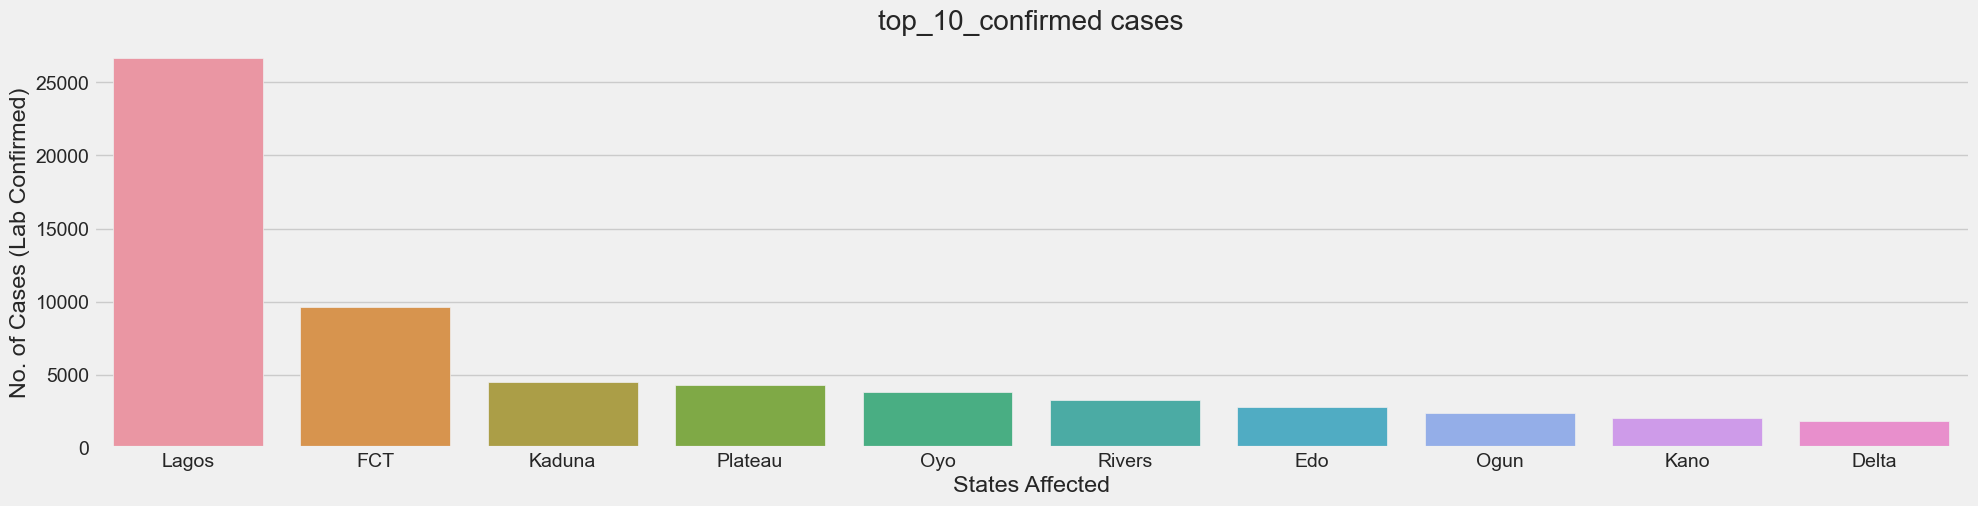

In [134]:
sns.catplot(kind = 'bar', data = top_10_confirmd, x = 'States Affected', y = 'No. of Cases (Lab Confirmed)', aspect = 4)
plt.title('top_10_confirmed cases')

# Top 10  Discharged Covid cases.

In [135]:
top_10_Discharged = dfCovidNig.nlargest(10, 'No. Discharged')

In [136]:
top_10_Discharged

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


Text(0.5, 1.0, 'top_10_Discharged cases')

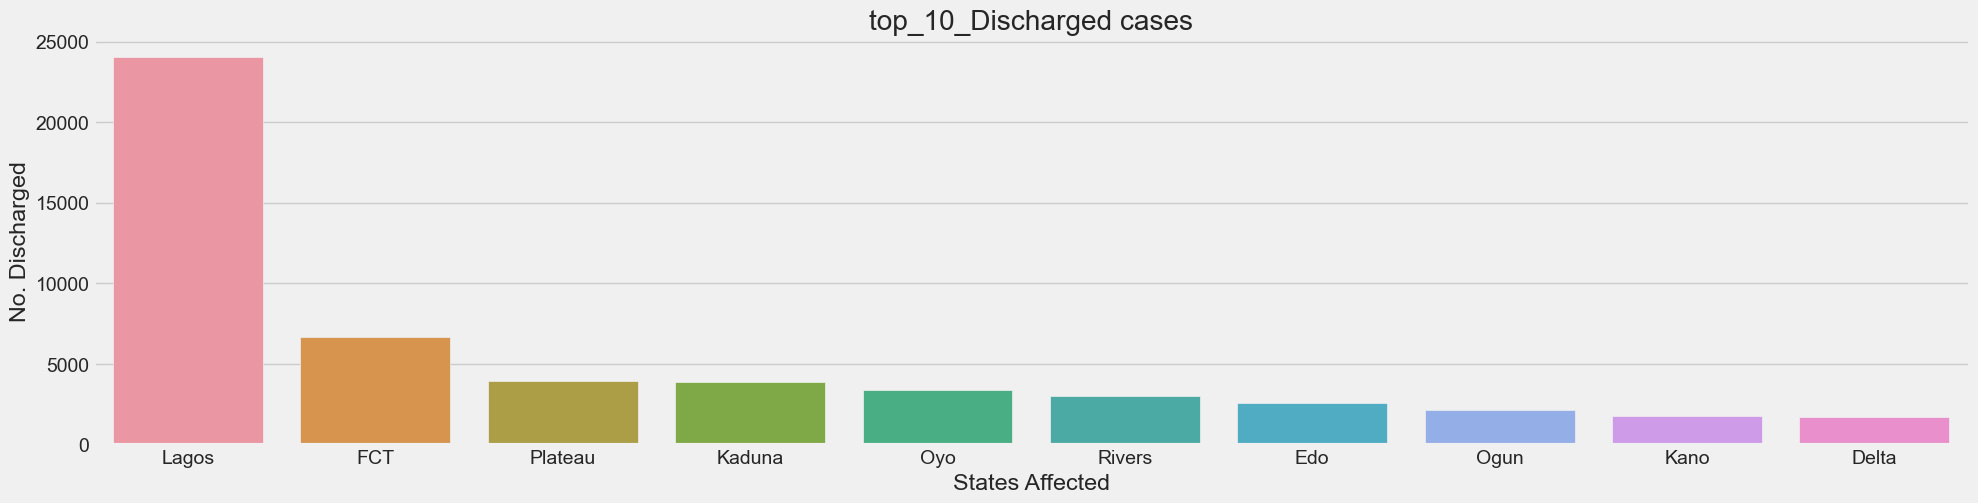

In [137]:
sns.catplot(kind = 'bar', data = top_10_Discharged, x = 'States Affected', y = 'No. Discharged', aspect = 4)
plt.title('top_10_Discharged cases')

# top 10 Death cases

In [138]:
top_10_Death= dfCovidNig.nlargest(10, 'No. of Deaths')

In [139]:
top_10_Death

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


Text(0.5, 1.0, 'top_10_Death cases')

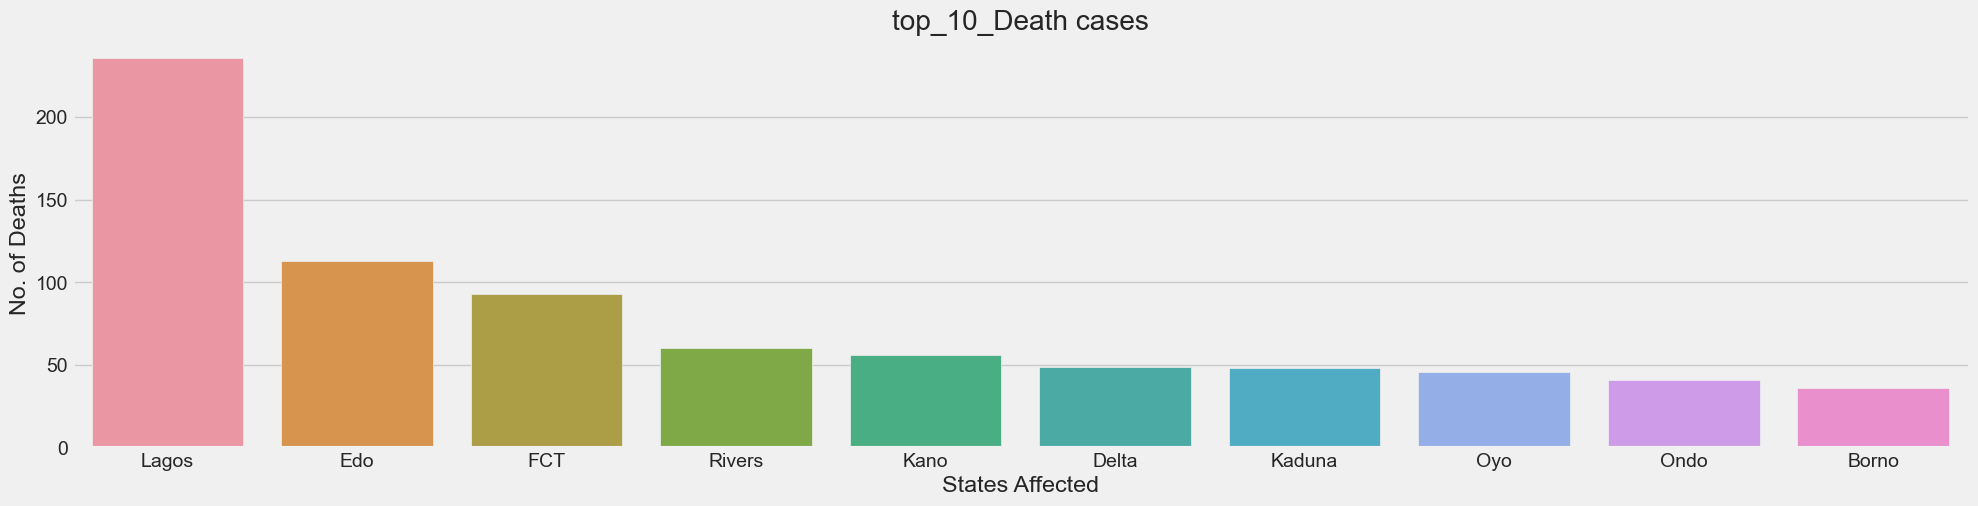

In [140]:
sns.catplot(kind = 'bar', data = top_10_Death, x = 'States Affected', y = 'No. of Deaths', aspect = 4)
plt.title('top_10_Death cases')

# Plot for the total daily confirmed, recovered and death cases in Nigeria

In [141]:
NGConfirmdCase_transposed

,Date,Cases
0,2/28/20,1
1,2/29/20,1
2,3/1/20,1
3,3/2/20,1
4,3/3/20,1
...,...,...
1101,3/5/23,266598
1102,3/6/23,266598
1103,3/7/23,266598
1104,3/8/23,266598


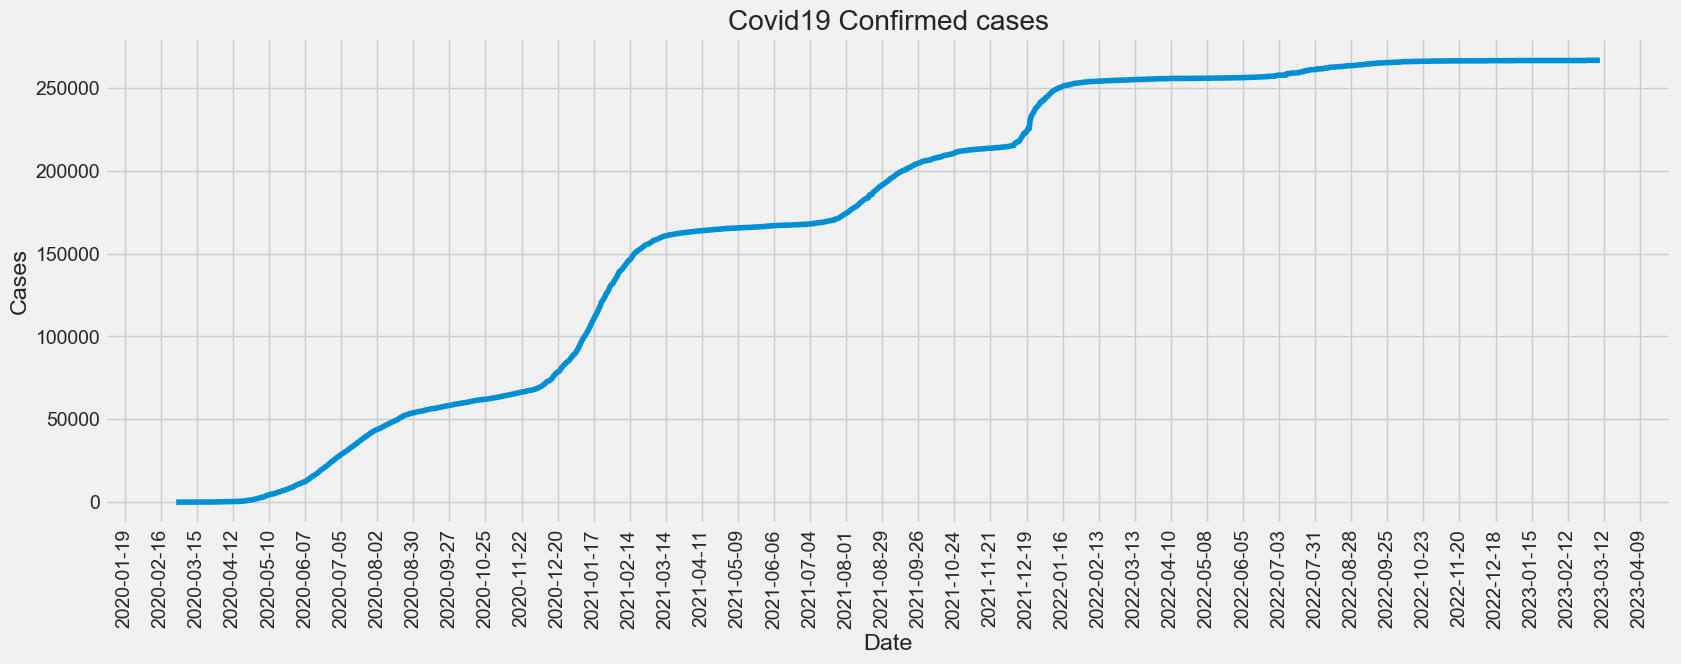

In [142]:
# Convert the "Date" column to datetime format
NGConfirmdCase_transposed['Date'] = pd.to_datetime(NGConfirmdCase_transposed['Date'])

# Set the size of the plot
plt.figure(figsize=(18, 6))

# Create the line plot
sns.lineplot(x="Date", y="Cases", data=NGConfirmdCase_transposed)

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Covid19 Confirmed cases")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Set the desired starting point for the date locator (e.g., '2023-03-01')
start_date = '2023-03-01'

# Convert the start_date to a matplotlib date format
start_date = mdates.datestr2num(start_date)

# Calculate the number of days since the start_date for all data points
days_since_start = NGConfirmdCase_transposed['Date'].apply(lambda date: mdates.date2num(date) - start_date)

# Create the major tick positions based on the number of days
major_tick_positions = days_since_start.tolist()

# Set the major tick positions and format the major ticks with the desired date format
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format as desired, e.g., '%Y-%m-%d'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=28))  # Display major ticks every 7 days
plt.gca().xaxis.set_major_formatter(date_formatter)

In [143]:
dfRecoveredCase_transposed

,Date,Cases
0,3/18/20,1
1,3/19/20,1
2,3/20/20,1
3,3/21/20,1
4,3/22/20,2
...,...,...
500,7/31/21,164994
501,8/1/21,165005
502,8/2/21,165037
503,8/3/21,165122


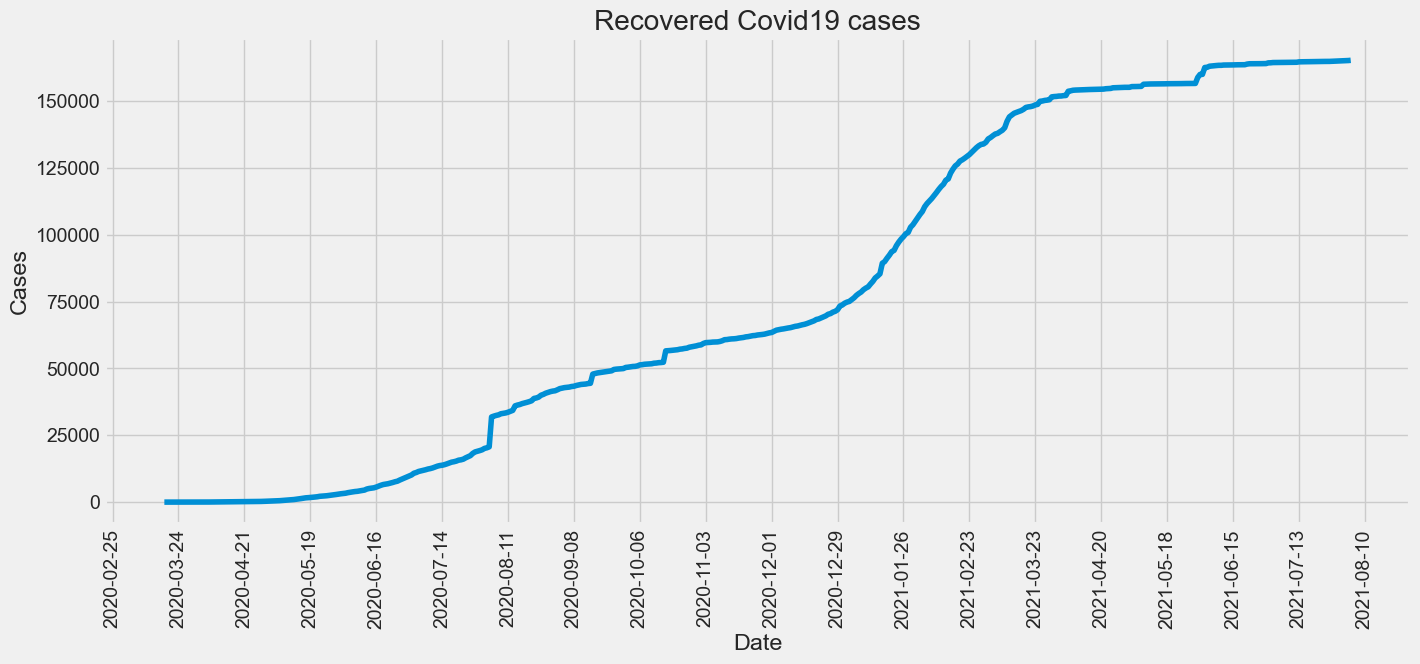

In [144]:
# Convert the "Date" column to datetime format
dfRecoveredCase_transposed['Date'] = pd.to_datetime(dfRecoveredCase_transposed['Date'])

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Create the line plot
sns.lineplot(x="Date", y="Cases", data=dfRecoveredCase_transposed)

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Recovered Covid19 cases")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Set the desired starting point for the date locator (e.g., '2023-03-01')
start_date = '2023-03-01'

# Convert the start_date to a matplotlib date format
start_date = mdates.datestr2num(start_date)

# Calculate the number of days since the start_date for all data points
days_since_start = dfRecoveredCase_transposed['Date'].apply(lambda date: mdates.date2num(date) - start_date)

# Create the major tick positions based on the number of days
major_tick_positions = days_since_start.tolist()

# Set the major tick positions and format the major ticks with the desired date format
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format as desired, e.g., '%Y-%m-%d'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=28))  # Display major ticks every 7 days
plt.gca().xaxis.set_major_formatter(date_formatter)

In [145]:
dfDeathCase_transposed

,Date,Cases
0,3/23/20,1
1,3/24/20,1
2,3/25/20,1
3,3/26/20,1
4,3/27/20,1
...,...,...
1077,3/5/23,3155
1078,3/6/23,3155
1079,3/7/23,3155
1080,3/8/23,3155


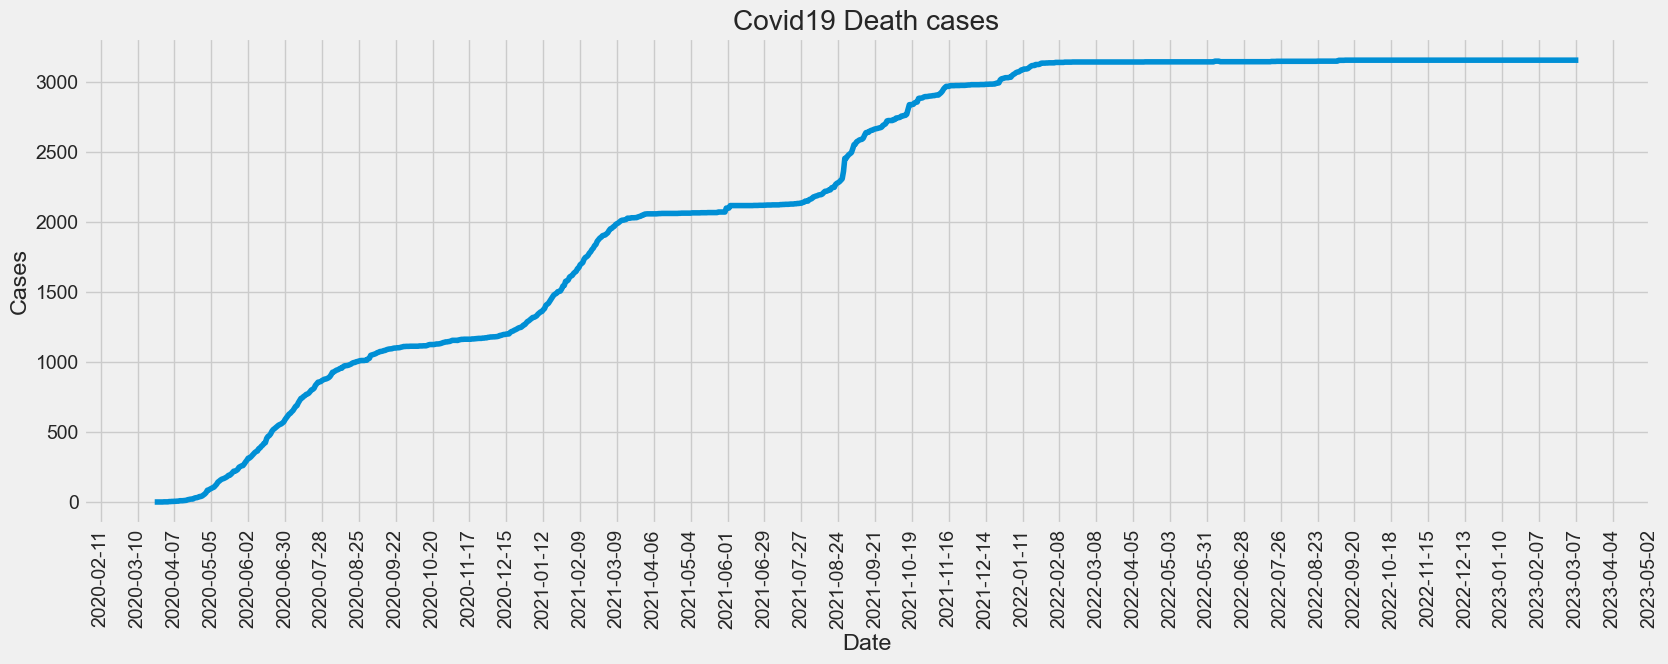

In [146]:

# Convert the "Date" column to datetime format
dfDeathCase_transposed['Date'] = pd.to_datetime(dfDeathCase_transposed['Date'])

# Set the size of the plot
plt.figure(figsize=(18, 6))

# Create the line plot
sns.lineplot(x="Date", y="Cases", data=dfDeathCase_transposed)

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Covid19 Death cases")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Set the desired starting point for the date locator (e.g., '2023-03-01')
start_date = '2023-03-01'

# Convert the start_date to a matplotlib date format
start_date = mdates.datestr2num(start_date)

# Calculate the number of days since the start_date for all data points
days_since_start = dfRecoveredCase_transposed['Date'].apply(lambda date: mdates.date2num(date) - start_date)

# Create the major tick positions based on the number of days
major_tick_positions = days_since_start.tolist()

# Set the major tick positions and format the major ticks with the desired date format
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format as desired, e.g., '%Y-%m-%d'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=28))  # Display major ticks every 7 days
plt.gca().xaxis.set_major_formatter(date_formatter)

# Combined Cases(Confirmed, Recovered & Death)

In [147]:
merged_Cases = pd.merge(NGConfirmdCase_transposed, dfRecoveredCase_transposed, on='Date').merge(dfDeathCase_transposed, on='Date')

In [148]:
merged_Cases

,Date,Cases_x,Cases_y,Cases
0,2020-03-23,40,2,1
1,2020-03-24,44,2,1
2,2020-03-25,51,2,1
3,2020-03-26,65,2,1
4,2020-03-27,70,3,1
...,...,...,...,...
495,2021-07-31,173908,164994,2149
496,2021-08-01,174315,165005,2149
497,2021-08-02,174759,165037,2160
498,2021-08-03,175264,165122,2163


In [149]:
merged_Cases = merged_Cases.fillna(0)

In [150]:
merged_Cases

,Date,Cases_x,Cases_y,Cases
0,2020-03-23,40,2,1
1,2020-03-24,44,2,1
2,2020-03-25,51,2,1
3,2020-03-26,65,2,1
4,2020-03-27,70,3,1
...,...,...,...,...
495,2021-07-31,173908,164994,2149
496,2021-08-01,174315,165005,2149
497,2021-08-02,174759,165037,2160
498,2021-08-03,175264,165122,2163


In [151]:
merged_Cases.columns

Index(['Date', 'Cases_x', 'Cases_y', 'Cases'], dtype='object')

In [152]:
merged_Cases.columns = ['Date','Confirmed_Case', 'Recovered_Case', 'DeathCase_Case']

In [153]:
merged_Cases

,Date,Confirmed_Case,Recovered_Case,DeathCase_Case
0,2020-03-23,40,2,1
1,2020-03-24,44,2,1
2,2020-03-25,51,2,1
3,2020-03-26,65,2,1
4,2020-03-27,70,3,1
...,...,...,...,...
495,2021-07-31,173908,164994,2149
496,2021-08-01,174315,165005,2149
497,2021-08-02,174759,165037,2160
498,2021-08-03,175264,165122,2163


Text(0.5, 1.0, 'Visualization of the 3 major cases')

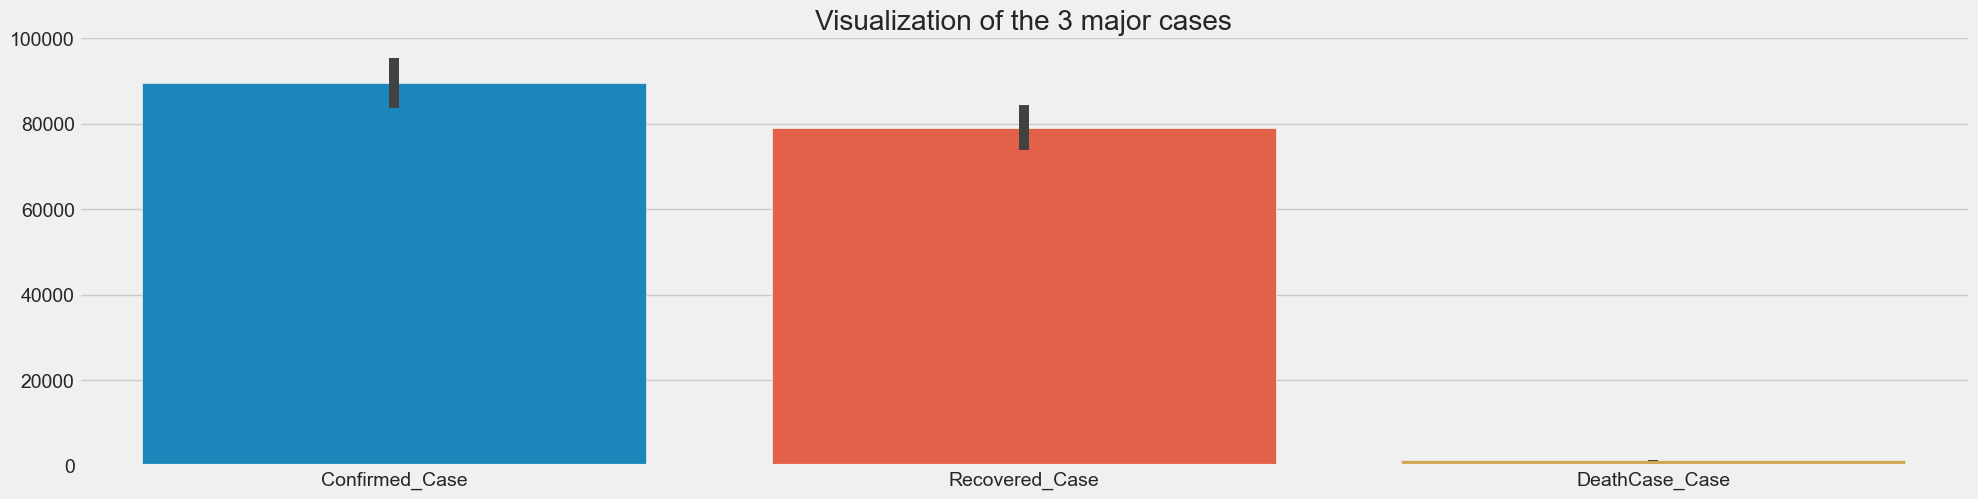

In [154]:
sns.catplot(kind = 'bar', data = merged_Cases, aspect = 4)
plt.title('Visualization of the 3 major cases')

# Determine the daily infection rate

In [155]:
NGConfirmdCase_transposed

,Date,Cases
0,2020-02-28,1
1,2020-02-29,1
2,2020-03-01,1
3,2020-03-02,1
4,2020-03-03,1
...,...,...
1101,2023-03-05,266598
1102,2023-03-06,266598
1103,2023-03-07,266598
1104,2023-03-08,266598


In [156]:
dfConfirmdCaseDiff = NGConfirmdCase_transposed.diff()

In [157]:
dfConfirmdCaseDiff

,Date,Cases
0,NaT,NaN
1,1 days,0
2,1 days,0
3,1 days,0
4,1 days,0
...,...,...
1101,1 days,0
1102,1 days,0
1103,1 days,0
1104,1 days,0


In [158]:
NGConfirmdCase_transposed[['Cases']] = NGConfirmdCase_transposed[['Cases']].astype(int)

In [159]:
NGConfirmdCase_transposed.dtypes

Date     datetime64[ns]
Cases             int32
dtype: object

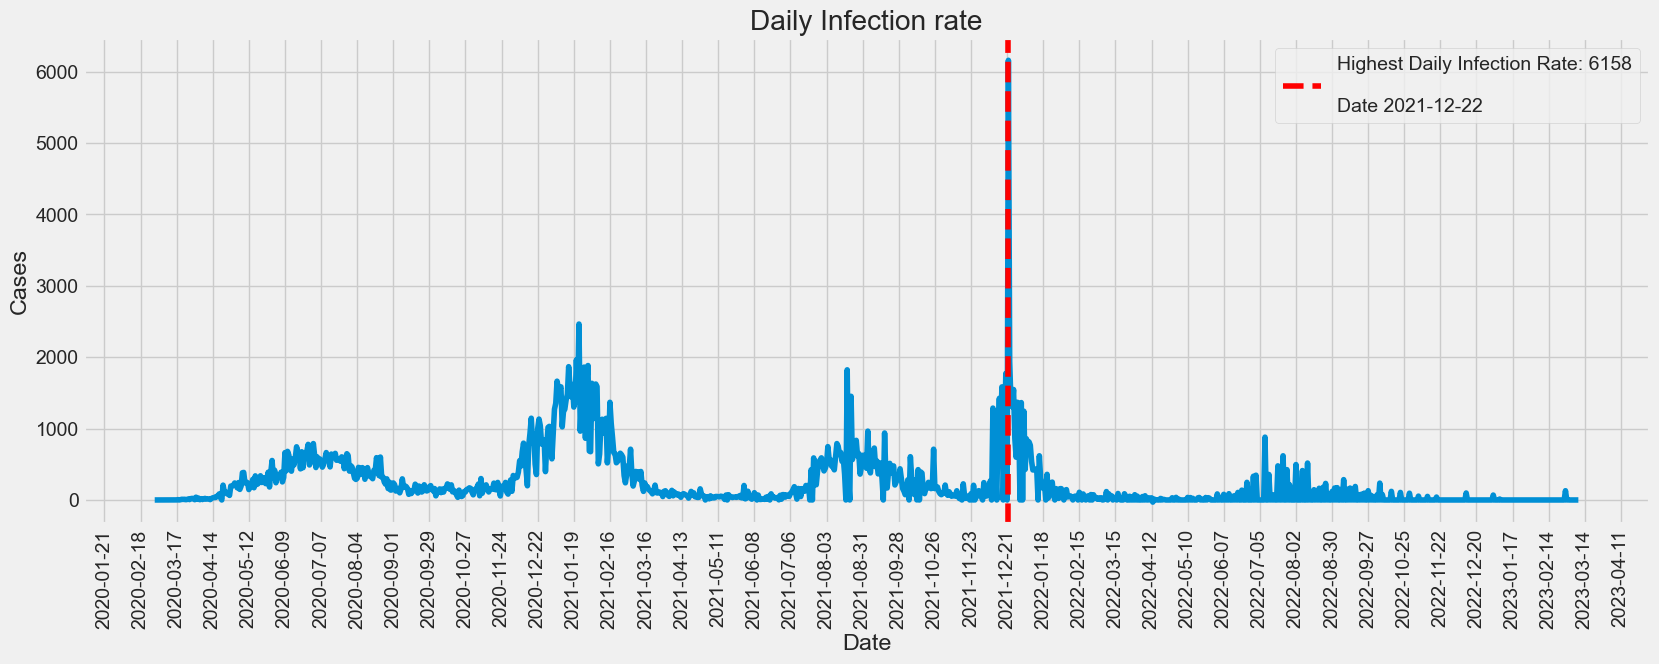

In [160]:

# Convert the "Date" column to datetime format
NGConfirmdCase_transposed['Date'] = pd.to_datetime(NGConfirmdCase_transposed['Date'])

# Set the size of the plot
plt.figure(figsize=(18, 6))

# Create the line plot
sns.lineplot(x="Date", y=NGConfirmdCase_transposed['Cases'].diff(), data=NGConfirmdCase_transposed)

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Daily Infection rate")

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Set the desired starting point for the date locator (e.g., '2023-03-01')
start_date = '2023-03-01'

# Convert the start_date to a matplotlib date format
start_date = mdates.datestr2num(start_date)

# Calculate the number of days since the start_date for all data points
days_since_start = NGConfirmdCase_transposed['Date'].apply(lambda date: mdates.date2num(date) - start_date)

# Create the major tick positions based on the number of days
major_tick_positions = days_since_start.tolist()

# Set the major tick positions and format the major ticks with the desired date format
date_formatter = mdates.DateFormatter('%Y-%m-%d')  # Format as desired, e.g., '%Y-%m-%d'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=28))  # Display major ticks every 7 days
plt.gca().xaxis.set_major_formatter(date_formatter)

# Find the highest daily infection rate and its date
max_daily_infections = NGConfirmdCase_transposed['Cases'].diff().max()
max_daily_infections_date = NGConfirmdCase_transposed.loc[NGConfirmdCase_transposed['Cases'].diff().idxmax(), 'Date']
# Add a vertical line to highlight the date with the highest daily infection rate
plt.axvline(x=max_daily_infections_date, color='red', linestyle='--', label=f'Highest Daily Infection Rate: {max_daily_infections:.0f}\n\nDate {max_daily_infections_date.strftime("%Y-%m-%d")}')
plt.legend()

In [161]:
max_daily_infections

6158.0

In [162]:
max_daily_infections_date

Timestamp('2021-12-22 00:00:00')

# Relationship between Covid!9 and External data
Comfirm case Vs CCVI Index

In [195]:
df_Covidexternal

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
1,Plateau,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
2,Kwara,North Central,3524000,0,0,0.3,0.2,0,0.2,0.6,0.7,0
3,Nassarawa,North Central,2783000,0,0,0.5,0.9,0,0.1,0.6,0.5,0
4,Niger,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0
5,Benue,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
6,Kogi,North Central,4970000,0,0,0.2,0.5,0,0.4,0.3,0.6,0
7,Bauchi,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0
8,Gombe,North East,3692000,1,0,0.4,0.9,0,0.3,0.8,0.7,0
9,Borno,North East,6651000,0,0,0.1,1.0,1,0.1,0.7,0.9,0


In [196]:
dfCovidNig

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [199]:
dfCovidNig['states'] = dfCovidNig['states'].str.strip().str.upper()
df_Covidexternal['states'] = df_Covidexternal['states'].str.strip().str.upper()

# Merge data frames
merged_data = pd.merge(dfCovidNig, df_Covidexternal, on='states', how='outer')

In [200]:
dfCovidNig.head()

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,LAGOS,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,KADUNA,4504,579,3877,48
3,PLATEAU,4262,280,3948,34
4,OYO,3788,368,3374,46


In [201]:
merged_data

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,LAGOS,26708.0,2435.0,24037.0,236.0,South West,13992000.0,0.0,0.0,1.0,0.3,0.0,1.0,0.1,0.4,0.0
1,FCT,9627.0,2840.0,6694.0,93.0,North Central,4865000.0,0.0,0.0,0.9,0.4,0.0,0.9,0.6,0.2,0.0
2,KADUNA,4504.0,579.0,3877.0,48.0,North West,9227000.0,0.0,0.0,0.9,0.8,0.0,0.4,0.6,0.4,0.0
3,PLATEAU,4262.0,280.0,3948.0,34.0,North Central,4766000.0,0.0,0.0,0.4,0.8,0.0,0.3,0.5,0.3,0.0
4,OYO,3788.0,368.0,3374.0,46.0,South West,8737000.0,0.0,0.0,0.8,0.2,0.0,0.6,0.2,0.3,1.0
5,RIVERS,3279.0,232.0,2987.0,60.0,South South,7763000.0,0.0,0.0,0.9,0.6,0.0,0.9,0.1,0.1,1.0
6,EDO,2768.0,52.0,2603.0,113.0,South South,4705000.0,0.0,0.0,0.8,0.1,0.0,0.5,0.4,0.3,1.0
7,OGUN,2382.0,174.0,2175.0,33.0,South West,5878000.0,0.0,0.0,0.7,0.5,0.0,0.6,0.0,0.2,1.0
8,KANO,2032.0,198.0,1778.0,56.0,North West,14726000.0,0.0,0.0,0.1,0.3,0.0,0.8,0.8,0.5,0.0
9,DELTA,1843.0,57.0,1737.0,49.0,South South,6303000.0,0.0,0.0,0.7,0.2,1.0,0.6,0.5,0.4,1.0


In [203]:
merged_data = merged_data.dropna()

In [204]:
merged_data

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,LAGOS,26708.0,2435.0,24037.0,236.0,South West,13992000.0,0.0,0.0,1.0,0.3,0.0,1.0,0.1,0.4,0.0
1,FCT,9627.0,2840.0,6694.0,93.0,North Central,4865000.0,0.0,0.0,0.9,0.4,0.0,0.9,0.6,0.2,0.0
2,KADUNA,4504.0,579.0,3877.0,48.0,North West,9227000.0,0.0,0.0,0.9,0.8,0.0,0.4,0.6,0.4,0.0
3,PLATEAU,4262.0,280.0,3948.0,34.0,North Central,4766000.0,0.0,0.0,0.4,0.8,0.0,0.3,0.5,0.3,0.0
4,OYO,3788.0,368.0,3374.0,46.0,South West,8737000.0,0.0,0.0,0.8,0.2,0.0,0.6,0.2,0.3,1.0
5,RIVERS,3279.0,232.0,2987.0,60.0,South South,7763000.0,0.0,0.0,0.9,0.6,0.0,0.9,0.1,0.1,1.0
6,EDO,2768.0,52.0,2603.0,113.0,South South,4705000.0,0.0,0.0,0.8,0.1,0.0,0.5,0.4,0.3,1.0
7,OGUN,2382.0,174.0,2175.0,33.0,South West,5878000.0,0.0,0.0,0.7,0.5,0.0,0.6,0.0,0.2,1.0
8,KANO,2032.0,198.0,1778.0,56.0,North West,14726000.0,0.0,0.0,0.1,0.3,0.0,0.8,0.8,0.5,0.0
9,DELTA,1843.0,57.0,1737.0,49.0,South South,6303000.0,0.0,0.0,0.7,0.2,1.0,0.6,0.5,0.4,1.0


In [169]:
top_10_mergedConfirmd= merged_data.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [170]:
top_10_mergedConfirmd

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000,0,0,1.0,0.3,0,1.0,0.1,0.4,0
1,FCT,9627,2840,6694,93,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
2,Kaduna,4504,579,3877,48,North West,9227000,0,0,0.9,0.8,0,0.4,0.6,0.4,0
3,Plateau,4262,280,3948,34,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
4,Oyo,3788,368,3374,46,South West,8737000,0,0,0.8,0.2,0,0.6,0.2,0.3,1
5,Rivers,3279,232,2987,60,South South,7763000,0,0,0.9,0.6,0,0.9,0.1,0.1,1
6,Edo,2768,52,2603,113,South South,4705000,0,0,0.8,0.1,0,0.5,0.4,0.3,1
7,Ogun,2382,174,2175,33,South West,5878000,0,0,0.7,0.5,0,0.6,0.0,0.2,1
8,Kano,2032,198,1778,56,North West,14726000,0,0,0.1,0.3,0,0.8,0.8,0.5,0
9,Delta,1843,57,1737,49,South South,6303000,0,0,0.7,0.2,1,0.6,0.5,0.4,1


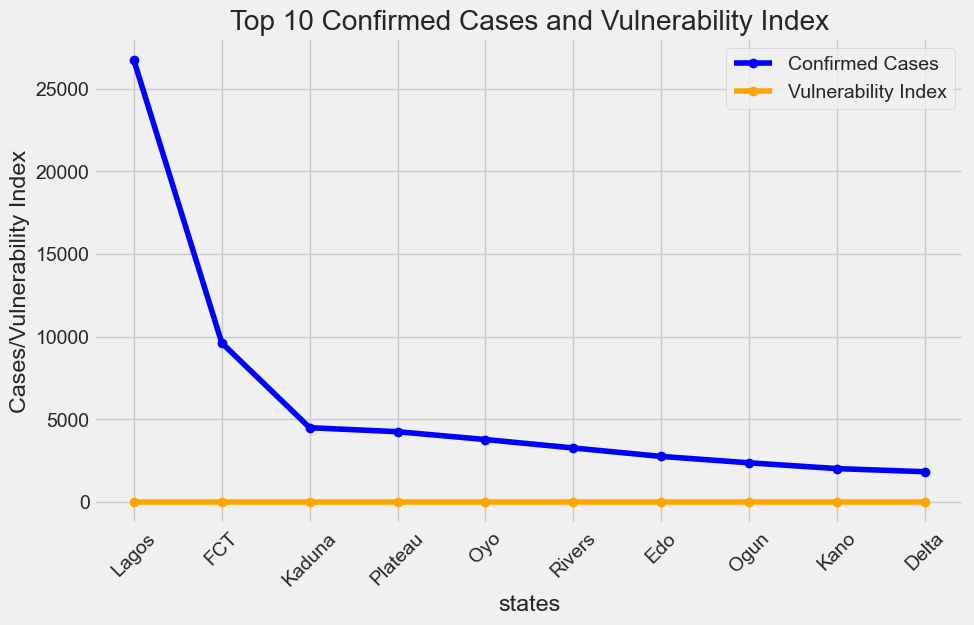

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_mergedConfirmd['states'], top_10_mergedConfirmd['No. of Cases (Lab Confirmed)'], label='Confirmed Cases', marker='o', color='blue')
plt.plot(top_10_mergedConfirmd['states'], top_10_mergedConfirmd['Overall CCVI Index'], label='Vulnerability Index', marker='o', color='orange')

# Set labels and title
plt.xlabel('states')
plt.ylabel('Cases/Vulnerability Index')
plt.title('Top 10 Confirmed Cases and Vulnerability Index')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

In [172]:
# Sort the DataFrame by "No. of Cases (Lab Confirmed)" in ascending order
merged_data_sorted = merged_data.sort_values(by='No. of Cases (Lab Confirmed)')

# Get the least 10 rows
merged_data_least_10 = merged_data_sorted.head(10)


In [173]:
merged_data_least_10

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
33,Kogi,5,0,3,2,North Central,4970000,0,0,0.2,0.5,0,0.4,0.3,0.6,0
32,Kebbi,143,5,130,8,North West,4968000,0,0,0.3,0.4,0,0.1,0.9,0.9,0
31,Yobe,164,33,123,8,North East,3723000,1,0,0.3,1.0,0,0.0,0.9,1.0,0
30,Taraba,203,19,177,7,North East,3387000,0,0,0.8,0.9,0,0.0,0.7,0.9,0
29,Sokoto,228,40,171,17,North West,5612000,0,0,0.2,0.4,0,0.3,1.0,1.0,0
28,Anambra,299,6,274,19,South East,6050000,0,0,1.0,0.6,0,1.0,0.0,0.1,1
27,Adamawa,355,96,238,21,North East,4672000,0,0,0.6,0.9,0,0.3,0.7,0.6,0
26,Niger,381,69,300,12,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0
25,Jigawa,386,57,318,11,North West,6435000,0,0,0.0,0.7,0,0.5,0.9,0.8,0
24,Akwa Ibom,395,44,342,9,South East,6093000,0,0,0.7,0.6,0,0.8,0.5,0.1,1


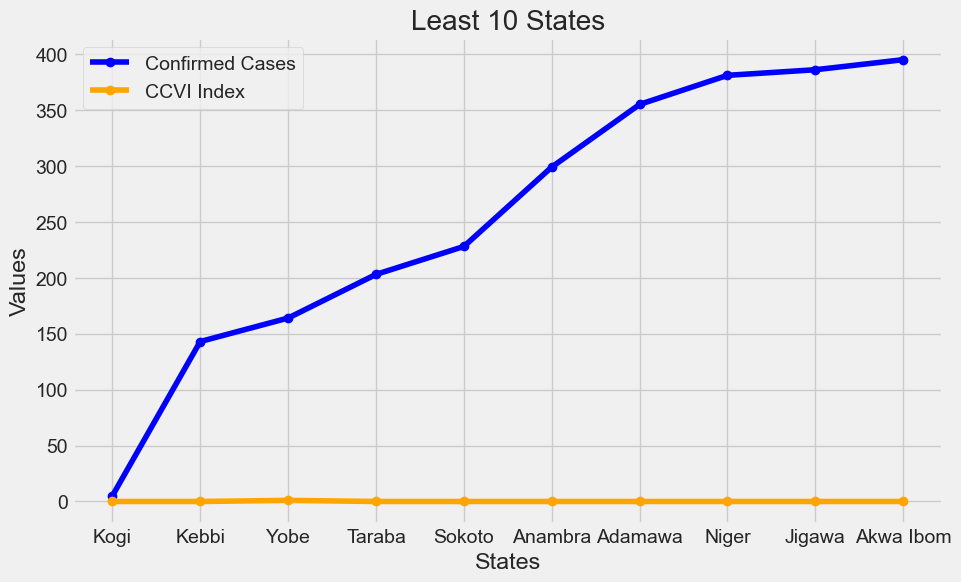

In [174]:
# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot the "No. of Cases (Lab Confirmed)" for the least 10 states
plt.plot(merged_data_least_10['states'], merged_data_least_10['No. of Cases (Lab Confirmed)'], marker='o', linestyle='-', color='blue', label='Confirmed Cases')

# Plot the "Overall CCVI Index" for the least 10 states
plt.plot(merged_data_least_10['states'], merged_data_least_10['Overall CCVI Index'], marker='o', linestyle='-', color='orange', label='CCVI Index')


# Set labels and title
plt.xlabel('States')
plt.ylabel('Values')
plt.title('Least 10 States')
# Add a legend
plt.legend()

# Visuaization of the linear relationships between Confirmed Cases and Population Density.

In [175]:
merged_data.head()

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000,0,0,1.0,0.3,0,1.0,0.1,0.4,0
1,FCT,9627,2840,6694,93,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
2,Kaduna,4504,579,3877,48,North West,9227000,0,0,0.9,0.8,0,0.4,0.6,0.4,0
3,Plateau,4262,280,3948,34,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
4,Oyo,3788,368,3374,46,South West,8737000,0,0,0.8,0.2,0,0.6,0.2,0.3,1


Text(0.5, 1.0, 'Regression Plot: Population Density vs. No. of Cases (Lab Confirmed)')

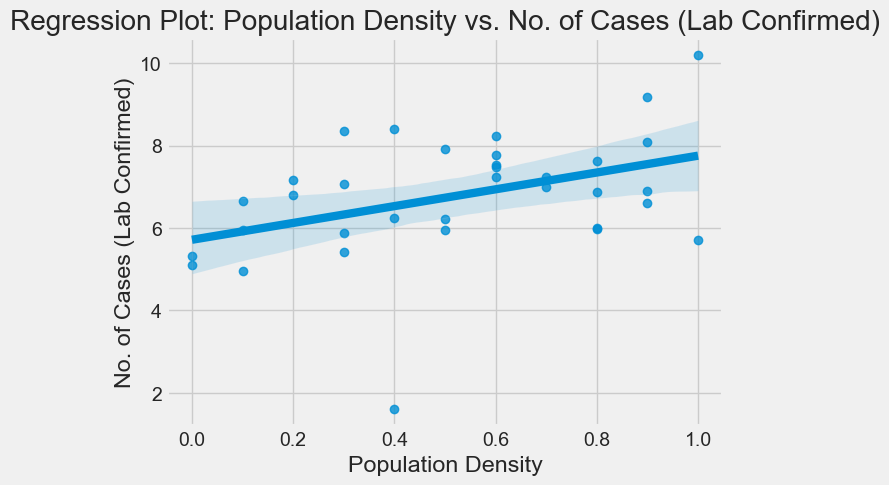

In [176]:
#Use the merged_data to plot your regression plot and convert the cases column to log.
sns.regplot(x = merged_data['Population Density'], y = np.log(merged_data['No. of Cases (Lab Confirmed)']))
# Add labels and title
plt.xlabel('Population Density')
plt.ylabel('No. of Cases (Lab Confirmed)')
plt.title('Regression Plot: Population Density vs. No. of Cases (Lab Confirmed)')


([<matplotlib.patches.Wedge at 0x3563d84750>,
 [Text(0.9352388413294948, 0.5790753920420592, 'South West'),
  Text(-0.10149524065232231, 1.0953075897321845, 'North Central'),
  Text(-1.025719479700726, 0.3973657621920542, 'North West'),
  Text(-0.8129097375184972, -0.741065286359851, 'North East'),
  Text(0.20212460954188927, -1.0812703834922786, 'South South'),
  Text(0.9846797028519302, -0.490312025950246, 'South East')],
 [Text(0.5101302770888152, 0.315859304750214, '17.6%'),
  Text(-0.055361040355812165, 0.5974405034902824, '17.6%'),
  Text(-0.5594833525640323, 0.21674496119566591, '17.6%'),
  Text(-0.4434053113737257, -0.4042174289235551, '17.6%'),
  Text(0.11024978702284868, -0.5897838455412427, '14.7%'),
  Text(0.5370980197374164, -0.26744292324558866, '14.7%')])

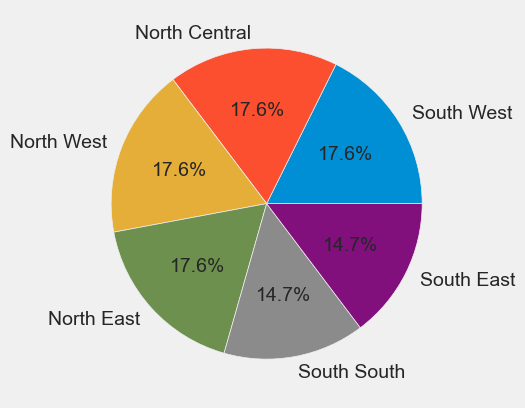

In [177]:
region_counts = merged_data['region'].value_counts()
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%')


# Real GDP Analysis

In [178]:
dfRealgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [179]:
pre_covid_gdp = dfRealgdp[(dfRealgdp['Year'] >= 2014) & (dfRealgdp['Year'] <= 2019)].sum().sum()

In [180]:
pre_covid_gdp

413801074.72

In [181]:
q2_2020_gdp = dfRealgdp[dfRealgdp['Year'] == 2020]['Q2'].iloc[0]

In [182]:
q2_2020_gdp

15890000.0

In [183]:
percentage_change = ((pre_covid_gdp - q2_2020_gdp)/pre_covid_gdp)*100

In [184]:
percentage_change

96.15999064024857

In [185]:
dfRealgdp.columns

Index(['Year', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

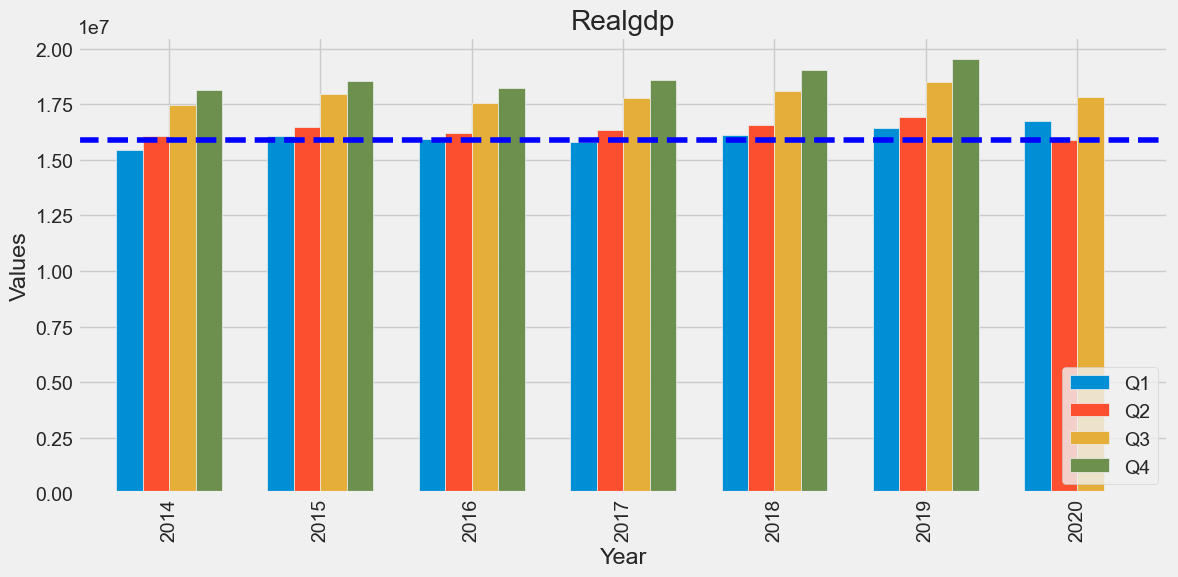

In [206]:
# Plot the bar chart for Initial and Revised Budgets
dfRealgdp.plot(x='Year', y= ['Q1', 'Q2', 'Q3', 'Q4'], kind='bar', figsize=(12, 6), width=0.7)
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Realgdp')
plt.legend(['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.axhline(y=dfRealgdp.loc[dfRealgdp['Year'] == 2020, 'Q2'].values[0], color='blue', linestyle='--')

# Real GDP Observation: 
The Real GDP value of the country Pre-COVID-19 has either been on the rise for all quarters or same until 2020 especially in the 2nd quarter (Q2) where the Gdp dropped below what it has ever been since 2014 thereby resulting to the backwardness of the country's economy.

# Budget Analysis

In [187]:
dfBudget

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [188]:
Highest_initial = dfBudget.loc[dfBudget['Initial_budget (Bn)'].idxmax(), 'states']
Lowest_initial = dfBudget.loc[dfBudget['Initial_budget (Bn)'].idxmin(), 'states']
Highest_revised = dfBudget.loc[dfBudget['Revised_budget (Bn)'].idxmax(), 'states']
Lowest_revised = dfBudget.loc[dfBudget['Revised_budget (Bn)'].idxmin(), 'states']
df_modified = dfBudget.copy()
df_modified['Budget_Diff'] = dfBudget['Initial_budget (Bn)'] - dfBudget['Revised_budget (Bn)']
df_modified['dfBudget_Percentage_Change'] = ((dfBudget['Initial_budget (Bn)'] - dfBudget['Revised_budget (Bn)']) / dfBudget['Initial_budget (Bn)']) * 100

In [189]:
Highest_initial

'Lagos'

In [190]:
Highest_revised

'Lagos'

In [191]:
Lowest_initial

'Yobe'

In [192]:
Lowest_revised

'Nasarawa'

In [193]:
df_modified

,states,Initial_budget (Bn),Revised_budget (Bn),Budget_Diff,dfBudget_Percentage_Change
0,Abia,136.60,102.70,33.90,24.816984
1,Adamawa,183.30,139.31,43.99,23.998909
2,Akwa-Ibom,597.73,366.00,231.73,38.768340
3,Anambra,137.10,112.80,24.30,17.724289
4,Bauchi,167.20,128.00,39.20,23.444976
5,Bayelsa,242.18,183.15,59.03,24.374432
6,Benue,189.00,119.00,70.00,37.037037
7,Borno,146.80,108.80,38.00,25.885559
8,Cross River,1100.00,147.10,952.90,86.627273
9,Delta,395.50,282.30,113.20,28.621997


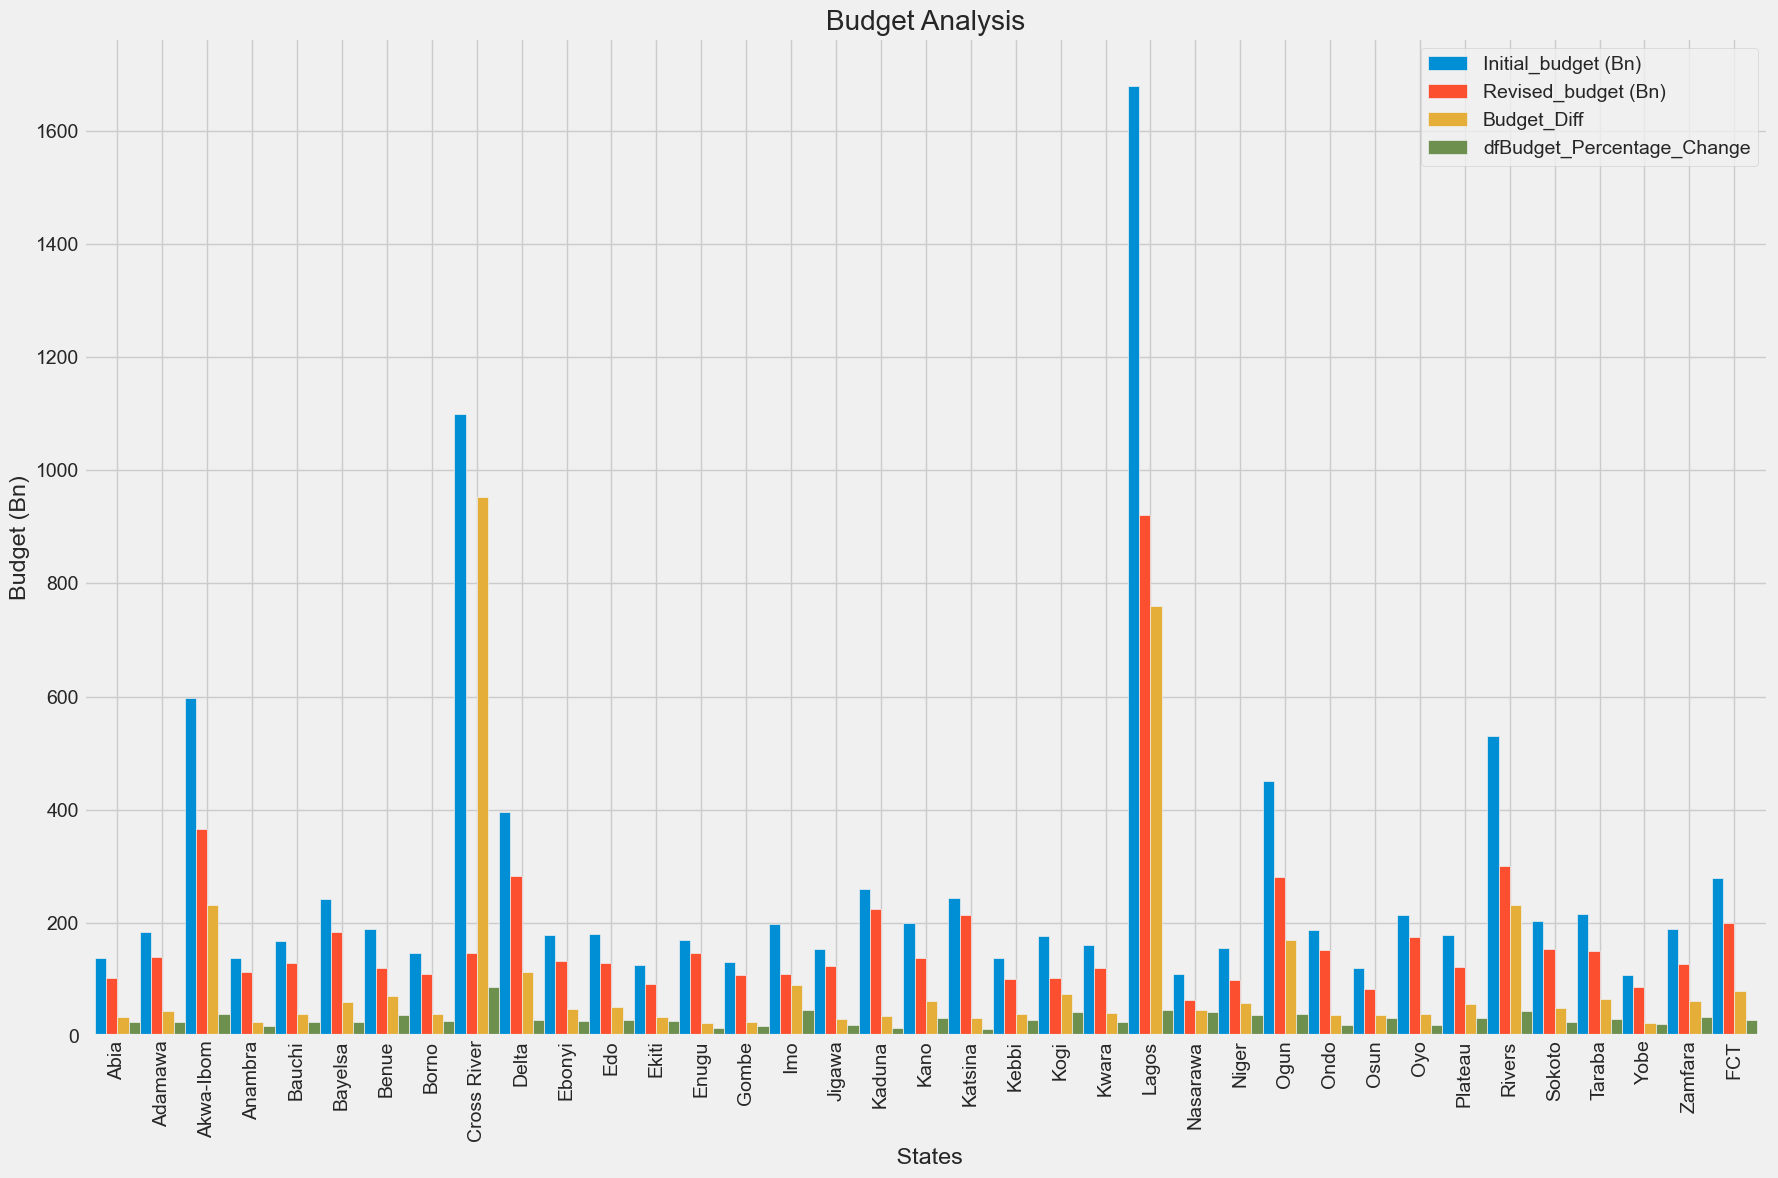

In [194]:
# Plot the bar chart for Initial and Revised Budgets
df_modified.plot(x='states', y=['Initial_budget (Bn)', 'Revised_budget (Bn)', 'Budget_Diff', 'dfBudget_Percentage_Change'], kind='bar', width=1,  figsize=(18, 12))
plt.xlabel(' States')
plt.ylabel('Budget (Bn)')
plt.title('Budget Analysis')
plt.xticks(rotation=90)
plt.legend(['Initial_budget (Bn)', 'Revised_budget (Bn)', 'Budget_Diff', 'dfBudget_Percentage_Change'])
plt.tight_layout()